In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In [2]:
import mnist_reader
train_images, train_labels = mnist_reader.load_mnist('data/', kind='train')
test_images, test_labels = mnist_reader.load_mnist('data/', kind='t10k')

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images.reshape(len(train_labels), 28, 28).shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

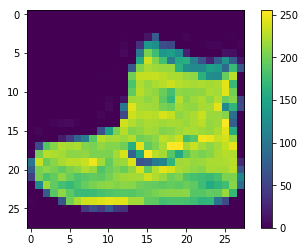

In [11]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

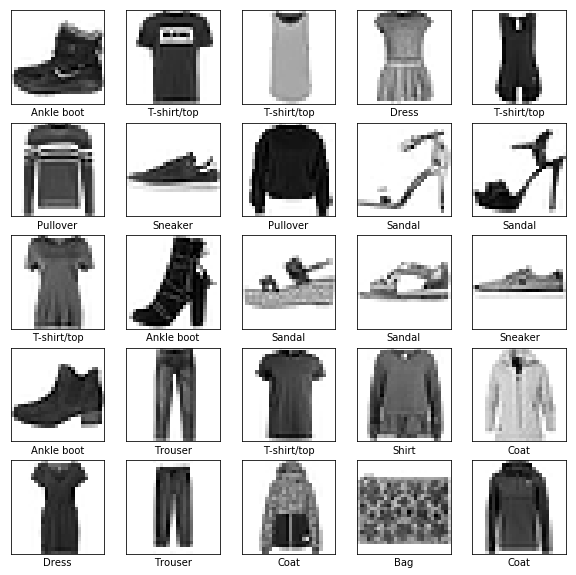

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [14]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.4953 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3725 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3367 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3127 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2937 - acc: 0.8931


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/step
Test accuracy: 0.8673


In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([2.8616216e-07, 1.0839373e-06, 7.6682300e-06, 6.6346888e-07,
       1.6366871e-06, 3.7848469e-02, 8.3859813e-06, 3.4240194e-02,
       1.9232863e-05, 9.2787236e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array, true_label, img):
  print(predictions_array)
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  print(predictions_array)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

[[2.86162162e-07 1.08393726e-06 7.66822996e-06 ... 3.42401937e-02
  1.92328625e-05 9.27872360e-01]
 [1.75998127e-06 8.43967118e-10 9.98296797e-01 ... 4.40874767e-13
  1.84577542e-09 3.37212571e-13]
 [3.98560900e-08 1.00000000e+00 9.14313902e-10 ... 3.53874742e-19
  8.93320400e-12 4.44731671e-17]
 ...
 [5.91339369e-04 2.10735664e-07 5.30093210e-03 ... 1.18055844e-07
  9.93797839e-01 1.82648634e-08]
 [1.22352688e-07 9.99790132e-01 9.27914101e-09 ... 2.96469689e-11
  4.00407103e-08 4.00847044e-09]
 [1.37356228e-05 1.14856573e-06 1.92487387e-05 ... 6.96983328e-03
  5.50318277e-04 1.03338156e-04]]
[2.8616216e-07 1.0839373e-06 7.6682300e-06 6.6346888e-07 1.6366871e-06
 3.7848469e-02 8.3859813e-06 3.4240194e-02 1.9232863e-05 9.2787236e-01]


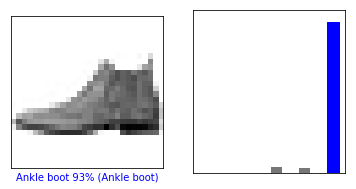

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

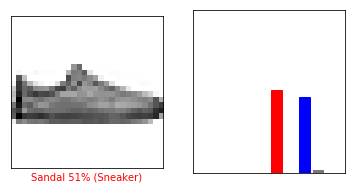

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

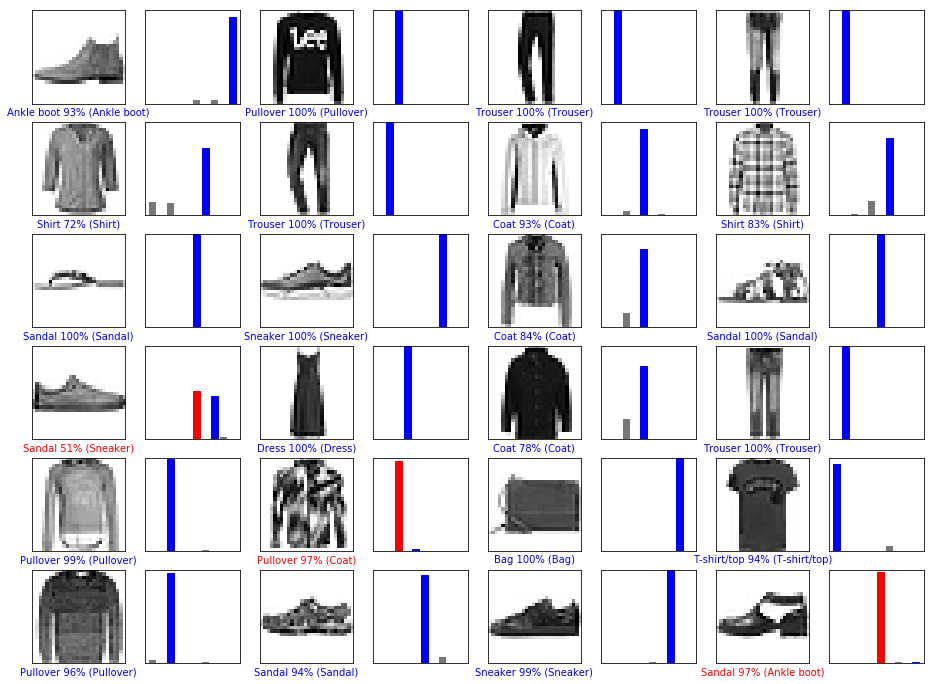

In [31]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [26]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.8616245e-07 1.0839373e-06 7.6682300e-06 6.6346951e-07 1.6366855e-06
  3.7848469e-02 8.3859886e-06 3.4240201e-02 1.9232844e-05 9.2787236e-01]]


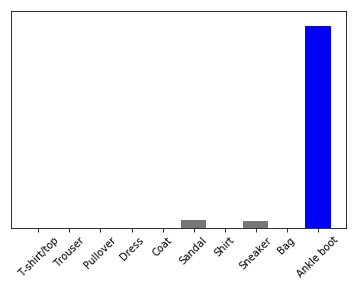

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

9

In [8]:
sess = tf.InteractiveSession()
x = tf.constant([[1, 2, 3], [1, 2, 3]])
y = tf.constant([[1, 0, 1], [0, 1, 0]])
z = tf.multiply(x, y)
print(sess.run(z))

w = tf.matmul(x, y, transpose_a = True)
print(sess.run(w))



[[1 0 3]
 [0 2 0]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]
